(CPEA)=

# 1.4 Condición de un problema y estabilidad de un algoritmo

```{admonition} Notas para contenedor de docker:

Comando de docker para ejecución de la nota de forma local:

nota: cambiar `<ruta a mi directorio>` por la ruta de directorio que se desea mapear a `/datos` dentro del contenedor de docker.

`docker run --rm -v <ruta a mi directorio>:/datos --name jupyterlab_optimizacion -p 8888:8888 -d palmoreck/jupyterlab_optimizacion:2.1.4`

password para jupyterlab: `qwerty`

Detener el contenedor de docker:

`docker stop jupyterlab_optimizacion`

Documentación de la imagen de docker `palmoreck/jupyterlab_optimizacion:2.1.4` en [liga](https://github.com/palmoreck/dockerfiles/tree/master/jupyterlab/optimizacion).

```

---

Nota generada a partir de [liga](https://www.dropbox.com/s/5bc6tn39o0qqg35/1.3.Condicion_estabilidad_y_normas.pdf?dl=0)

```{admonition} Al final de esta nota el y la lectora:
:class: tip

* Podrá dar una justificación del por qué un algoritmo es exacto o inexacto en el cálculo de aproximaciones para cantidades de interés.

* Aprenderá sobre los conceptos de condición de un problema y estabilidad de un algoritmo.

* Comprenderá que el condicionamiento de un problema es inherente al problema mismo y no depende del algoritmo utilizado.

* En específico se trabajará sobre el número de condición de una matriz como una cantidad que ayuda a clasificar problemas bien y mal condicionados en la solución de sistemas de ecuaciones lineales y otros.

```

Dos temas fundamentales en el análisis numérico son: la **condición de un problema** y **estabilidad de un algoritmo**. El condicionamiento tiene que ver con el comportamiento de un problema ante perturbaciones y la estabilidad con el comportamiento de un algoritmo (usado para resolver un problema) ante perturbaciones.

La exactitud de un cálculo dependerá finalmente de una combinación de estos términos:

<p style="text-align: center;">Exactitud = Condición + Estabilidad</p>

La falta de exactitud en un problema se presenta entonces por problemas mal condicionados (no importando si los algoritmos son estables o inestables) y algoritmos inestables (no importando si los problemas son mal o bien condicionados).

- Un algoritmo nos parecera adecuado si es estable.

## Perturbaciones

La condición de un problema y estabilidad de un algoritmo hacen referencia al término **perturbación**. Tal término conduce a pensar en perturbaciones "chicas" o "grandes". Para dar una medida de lo anterior se utiliza el concepto de **norma**. Ver {ref}`Normas vectoriales y matriciales <NVM>` para definición de norma y propiedades.

## Condición de un problema

Pensemos a un problema como una función $f: \mathbb{X} \rightarrow \mathbb{Y}$ donde $\mathbb{X}$ es un espacio vectorial con norma definida y $\mathbb{Y}$ es otro espacio vectorial de soluciones con una norma definida. Llamemos instancia de un problema a la combinación entre $x,f$ y nos interesa el comportamiento de $f$ en $x$. Usamos el nombre de "problema" para referirnos al de instancia del problema.

Un problema (instancia) bien condicionado tiene la propiedad de que todas las perturbaciones pequeñas en $x$ conducen a pequeños cambios en $f(x)$. Y es mal condicionado si perturbaciones pequeñas en $x$ conducen a grandes cambios en $f(x)$. El uso de los términos "pequeño" o "grande" dependen del problema mismo.

Sea $\hat{x} = x + \Delta x$ con $\Delta x$ una perturbación pequeña de $x$.

El **número de condición relativo del problema $f$ en $x$** es:

$$\text{Cond}_f^R = \frac{\text{ErrRel}(f(\hat{x}))}{\text{ErrRel}(\hat{x})}  = \frac{\frac{||f(\hat{x})-f(x)||}{||f(x)||}}{\frac{||x-\hat{x}||}{||x||}}$$

considerando $x,f(x) \neq 0$.

- Estamos midiendo el tamaño de las perturbaciones en la salida vs. tamaño de las perturbaciones en la entrada

```{admonition} Observación
:class: tip

Si $f$ es una función diferenciable, podemos evaluar $\text{Cond}_f^R$ con la derivada de $f$, pues a primer orden (usando teorema de Taylor): $f(\hat{x})-f(x) \approx \mathcal{J}_f(x)\Delta x$ con igualdad para $\Delta x \rightarrow 0$ y $\mathcal{J}_f$ la Jacobiana de $f$ definida como una matriz con entradas: $(\mathcal{J}_f(x))_{ij} = \frac{\partial f_i(x)}{\partial x_j}$. Por tanto, se tiene:

$$\text{Cond}_{f}^R = \frac{||\mathcal{J}_f(x)||||x||}{||f(x)||}$$

y $||\mathcal{J}_f(x)||$ es una norma matricial inducida por las normas en $\mathbb{X}, \mathbb{Y}$. Ver {ref}`Normas vectoriales y matriciales <NVM>`.

```

```{admonition} Comentario

En la práctica se considera a un problema **bien condicionado** si $\text{Cond}_f^R$ es "pequeño": menor a $10$, **medianamente condicionado** si es de orden entre $10^1$ y $10^2$ y **mal condicionado** si es "grande": mayor a $10^3$.
```

```{admonition} Ejercicio
:class: tip

Calcular $\text{Cond}_f^R$ de los siguientes problemas. Para $x \in \mathbb{R}$ usa el valor absoluto y para $x \in \mathbb{R}^n$ usa $||x||_\infty$.

1. $x \in \mathbb{R} - \{0\}$. Problema: realizar la operación $\frac{x}{2}$.

2. $x \geq 0$. Problema: calcular $\sqrt{x}$.

3. $x \approx \frac{\pi}{2}$. Problema: calcular $\cos(x)$.

4. $x \in \mathbb{R}^2$. Problema: calcular $x_1-x_2$.
```

- Respuestas:
    - 1 -> 1
    - 2 ->

```{admonition} Comentario

Las dificultades que pueden surgir al resolver un problema **no** siempre están relacionadas con una fórmula o un algoritmo mal diseñado sino con el problema en cuestión. En el ejercicio anterior, observamos que áun utilizando **aritmética exacta**, la solución del problema puede ser altamente sensible a perturbaciones a los datos de entrada. Por esto el número de condición relativo se define de acuerdo a perturbaciones en los datos de entrada y mide la perturbación en los datos de salida que uno espera: 

$$\text{Cond}_f^R = \frac{||\text{Cambios relativos en la solución}||}{||\text{Cambios relativos en los datos de entrada}||}.$$

```

## Estabilidad de un algoritmo

Pensemos a un algoritmo $\hat{f}$ como una función $\hat{f}:\mathbb{X}\rightarrow \mathbb{Y}$ para resolver el problema $f$ con datos $x \in \mathbb{X}$, donde $\mathbb{X}$ es un espacio vectorial con norma definida y $\mathbb{Y}$ es otro espacio vectorial con una norma definida.


La implementación del algoritmo $\hat{f}$ en una máquina conduce a considerar:

* Errores por redondeo:

$$fl(u) = u(1+\epsilon), |\epsilon| \leq \epsilon_{maq}, \forall u \in \mathbb{R}.$$

* Operaciones en un SPFN, $\mathcal{Fl}$. Por ejemplo para la suma:

$$u \oplus v  = fl(u+v) = (u + v)(1+\epsilon), |\epsilon|\leq \epsilon_{maq} \forall u,v \in \mathcal{Fl}.$$

Esto es, $\hat{f}$ depende de $x \in \mathbb{X}$ y $\epsilon_{maq}$: representación de los números reales en una máquina y operaciones entre ellos o aritmética de máquina. Ver nota: {ref}`Sistema de punto flotante <SPF>`.

Al ejecutar $\hat{f}$ obtenemos una colección de números en el SPFN que pertenecen a $\mathbb{Y}$: $\hat{f}(x)$.

Debido a las diferencias entre un problema con cantidades continuas y una máquina que trabaja con cantidades discretas, los algoritmos numéricos **no** son exactos para **cualquier** elección de datos $x \in \mathbb{X}$. Esto es, los algoritmos **no** cumplen que la cantidad: 

$$\frac{||\hat{f}(x)-f(x)||}{||f(x)||}$$

dependa únicamente de errores por redondeo al evaluar $f$ $\forall x \in \mathbb{X}$. En notación matemática:

$$\frac{||\hat{f}(x)-f(x)||}{||f(x)||} \leq K \epsilon_{maq} \forall x \in \mathbb{X}$$

con $K > 0$ no se cumple en general.

La razón de lo anterior tiene que ver con cuestiones en la implementación de $\hat{f}$ como el número de iteraciones, la representación de $x$ en un SPFN o el mal condicionamiento de $f$. Así, a los algoritmos en el análisis numérico, se les pide una condición menos estricta que la anterior y más bien satisfagan lo que se conoce como **estabilidad**. Se dice que un algoritmo $\hat{f}$ para un problema $f$ es **estable** si:

$$\forall x \in \mathbb{X}, \frac{||\hat{f}(x)-f(\hat{x})||}{||f(\hat{x})||} \leq K_1\epsilon_{maq}, K_1>0$$

para $\hat{x} \in \mathbb{X}$ tal que $\frac{||x-\hat{x}||}{||x||} \leq K_2\epsilon_{maq}, K_2>0$.

- Debe de cumplir con esas dos condiciones para que le podamos llamar "estable"

Esto es, $\hat{f}$ resuelve un problema cercano para datos cercanos (cercano en el sentido del $\epsilon_{maq}$) independientemente de la elección de $x$.

```{admonition} Observación
:class: tip

Obsérvese que esta condición es más flexible y en general $K_1, K_2$ dependen de las dimensiones de $\mathbb{X}, \mathbb{Y}$.
```

```{admonition} Comentarios

* Esta definición resulta apropiada para la mayoría de los problemas en el ánalisis numérico. Para otros problemas, por ejemplo en ecuaciones diferenciales, donde se tienen definiciones de sistemas dinámicos estables e inestables (cuyas definiciones no se deben confundir con las descritas para algoritmos), esta condición es muy estricta.

* Tenemos algoritmos que satisfacen una condición más estricta y simple que la estabilidad: **estabilidad hacia atrás**.
```

### Estabilidad hacia atrás

Decimos que un algoritmo $\hat{f}$ para el problema $f$ es **estable hacia atrás** si:

$$\forall x \in \mathbb{X}, \hat{f}(x) = f(\hat{x})$$

con $\hat{x} \in \mathbb{X}$ tal que $\frac{||x-\hat{x}||}{||x||} \leq K\epsilon_{maq}, K>0$.

Esto es, el algoritmo $\hat{f}$ da la solución **exacta** para datos cercanos (cercano en el sentido de $\epsilon_{maq}$), independientemente de la elección de $x$.

- Esta es más estricta que la norma pasada que vimos

### Ejemplo

Para entender la estabilidad hacia atrás de un algoritmo, considérese el ejemplo siguiente. 

**Problema:** evaluar $f(x) = e^x$ en $x=1$.

**Resultado:** $f(1) = e^1 = 2.718281...$.



In [1]:
import math
x=1
print(math.exp(x))

2.718281828459045


**Algoritmo:** truncar la serie $1 + x + \frac{x^2}{2} + \frac{x^3}{6} + \dots$ a cuatro términos: $\hat{f}(x) = 1 + x + \frac{x^2}{2} + \frac{x^3}{6}$.

**Resultado del algoritmo:** $\hat{f}(1) = 2.\bar{6}$


In [2]:
algoritmo = lambda x: 1 + x + x**2/2.0 + x**3/6.0

In [3]:
print(algoritmo(1))

2.6666666666666665


**Pregunta:** ¿Qué valor $\hat{x} \in \mathbb{R}$ hace que el valor calculado por el algoritmo $\hat{f}(1)$ sea igual a $f(\hat{x})$?

-> **Solución:** 

Resolver la ecuación: $e^{\hat{x}} = 2.\bar{6}$, esto es: $\hat{x} = log(2.\bar{6}) = 0.980829...$. Entonces $f(\hat{x}) = 2.\bar{6} = \hat{f}(x)$.


In [4]:
x_hat = math.log(algoritmo(1))
print(x_hat)

0.9808292530117262


Entonces, el algoritmo es estable hacia atrás sólo si la diferencia entre $x$ y $\hat{x}$ en términos relativos es menor a $K \epsilon_{maq}$ con $K >0$. Además, podemos calcular **errores hacia delante** y **errores hacia atrás**:

error hacia delante: $\hat{f}(x) - f(x) = -0.05161...$, error hacia atrás: $\hat{x}-x = -0.01917...$.


In [5]:
forward_error = algoritmo(x) - math.exp(x)
print(forward_error)

-0.05161516179237857


In [6]:
backward_error = x_hat-x
print(backward_error)

-0.019170746988273812


Dependiendo del problema, estos errores son pequeños o grandes, por ejemplo si consideramos tener una cifra correcta como suficiente para determinar que es una buena aproximación entonces podemos concluir: $\hat{f}$ obtiene una respuesta correcta y cercana al valor de $f$ (error hacia delante) y la respuesta que obtuvimos con $\hat{f}$ es correcta para datos ligeramente perturbados (error hacia atrás).



```{admonition} Observaciones
:class: tip

* Obsérvese que el error hacia delante requiere resolver el problema $f$ (para calcular $f(x)$) y también información sobre $f$.

* En el ejemplo anterior se calcularon $\hat{f}(x)$ y también qué tan larga debe ser la modificación en los datos $x$, esto es: $\hat{x}$, para que $\hat{f}(x) = f(\hat{x})$ (error hacia atrás).


* Dibujo que ayuda a ver errores hacia atrás y hacia delante:

<img src="https://dl.dropboxusercontent.com/s/b30awajxvl3u8qe/error_hacia_delante_hacia_atras.png?dl=0" heigth="500" width="500">

```

- Tiene ciertas ventajas calcular el error hacia atrás.
- "f gorro" podría ser la serie de Taylor truncada a 4 términos para aproximar "e"
- La estabilidad busca una "x_gorro" para evaluar una función.

En resumen, algunas características de un método **estable** numéricamente respecto al redondeo son:

* Variaciones "pequeñas" en los datos de entrada del método generan variaciones "pequeñas" en la solución del problema. 

* No amplifican errores de redondeo en los cálculos involucrados.

* Resuelven problemas "cercanos" para datos ligeramente modificados.

```{admonition} Observación
:class: tip

La estabilidad numérica que se revisó en esta sección hace referencia a los errores por redondeo de la aritmética y representación de los números en el {ref}`sistema de punto flotante <SPF>`. Tal uso no debe confundirse con la estabilidad numérica en el tema de ecuaciones diferenciales, ver [Stability_in_numerical_differential_equations](https://en.wikipedia.org/wiki/Numerical_stability#Stability_in_numerical_differential_equations).

```

(NCM)=

## Número de condición de una matriz

En el curso trabajaremos con algoritmos matriciales que son numéricamente estables (o estables hacia atrás) ante errores por redondeo, sin embargo la exactitud que obtengamos con tales algoritmos dependerán de qué tan bien (o mal) condicionado esté el problema. En el caso de matrices la condición de un problema puede ser cuantificada con el **número de condición** de la matriz del problema. Aunque haciendo uso de definiciones como la pseudoinversa de una matriz es posible definir el número de condición para una matriz en general rectangular $A \in \mathbb{R}^{m\times n}$, en esta primera definición consideramos matrices cuadradas no singulares $A \in \mathbb{R}^{n\times n}$:

$$\text{cond}(A) = ||A|| ||A^{-1}||.$$

```{admonition} Observación
:class: tip

Obsérvese que la norma anterior es una **norma matricial** y cond$(\cdot)$ puede calcularse para diferentes normas matriciales. Ver {ref}`Normas vectoriales y matriciales <NVM>` para definición de norma y propiedades.
```

- Con esto evaluamos cambios en la salida y cambios en la entrada.
- Si en una norma está mal condicionada, estará mal condicionada en cualquir norma. (es independiente de la norma).

## ¿Por qué se utiliza la expresión $||A|| ||A^{-1}||$ para definir el número de condición de una matriz?

Esta pregunta tiene que ver con el hecho que tal expresión aparece frecuentemente en problemas típicos de matrices. Para lo anterior considérese los siguientes problemas $f$:

1.Sean $A \in \mathbb{R}^{n\times n}$ no singular, $x \in \mathbb{R}^n$ y $f$ el problema de realizar la multiplicación $Ax$ para $x$ fijo, esto es: $f: \mathbb{R}^n \rightarrow \mathbb{R}^n$ dada por $f(x) = Ax$. Considérese una perturbación en $x: \hat{x} = x + \Delta x$, entonces:

$$\text{Cond}_f^R = \frac{\text{ErrRel}(f(\hat{x}))}{\text{ErrRel}(\hat{x})} = \frac{\frac{||f(\hat{x})-f(x)||}{||f(x)||}}{\frac{||x-\hat{x}||}{||x||}} \approx \frac{||\mathcal{J}_f(x)||||x||}{||f(x)||}.$$

Para este problema tenemos: 

$$\frac{||\mathcal{J}_f(x)||||x||}{||f(x)||} = \frac{||A|| ||x||}{||Ax||}.$$

Si las normas matriciales utilizadas en el número de condición son consistentes (ver {ref}`Normas vectoriales y matriciales <NVM>` para definición de norma y propiedades) entonces: 

$$||x|| = ||A^{-1}Ax|| \leq ||A^{-1}||||Ax|| \therefore \frac{||x||}{||Ax||} \leq ||A^{-1}||$$

y se tiene:

$$\text{Cond}_f^R \leq ||A|| ||A^{-1}||.$$

2.Sean $f: \mathbb{R}^n \rightarrow \mathbb{R}, A \in \mathbb{R}^{n\times n}$ no singular. Considérese el problema de calcular $f(b) = A^{-1}b$ para $b \in \mathbb{R}^n$ fijo y la perturbación $\hat{b} = b + \Delta b$ entonces bajo las suposiciones del ejemplo anterior:

$$\text{Cond}_f^R \approx \frac{||A^{-1}|| ||b||}{||A^{-1}b||}.$$

Si las normas matriciales utilizadas en el número de condición son consistentes (ver {ref}`Normas vectoriales y matriciales <NVM>` para definición de norma y propiedades) entonces: 

$$||b|| = ||AA^{-1}b|| \leq ||A|| ||A^{-1}b|| \therefore \text{Cond}_f^R \leq ||A^{-1}|| ||A||.$$

3.Sean $f: \mathbb{R}^{n\times n} \rightarrow \mathbb{R}^n, A \in \mathbb{R}^{n\times n}$ no singular $b \in \mathbb{R}^n$ fijo. Considérese el problema de calcular la solución $x$ del sistema $Az=b$, esto es, calcular: $x = f(A) = A^{-1}b.$ Además, considérese la perturbación $\hat{A} = A + \Delta A$ en el sistema $Az = b$. Se tiene:


$$\hat{x} = \hat{A}^{-1}b,$$

donde: $\hat{x} = x + \Delta x$ (si se perturba $A$ entonces se perturba también $x$).


De la ecuación anterior como $\hat{x} = \hat{A}^{-1}b$ se tiene:

$$\hat{A}\hat{x} = b$$

$$(A+\Delta A)(x+\Delta x) = b$$

$$Ax + A \Delta x + \Delta Ax + \Delta A \Delta x = b$$

$$b + A \Delta x + \Delta A x = b$$

Donde en esta última ecuación se supuso que $\Delta A \Delta x \approx 0$ y de aquí:

$$A \Delta x + \Delta A x  \approx 0 \therefore \Delta x \approx - A^{-1} \Delta A x.$$

Entonces se tiene que la condición del problema $f$: calcular la solución de sistema de ecuaciones lineales $Az=b$ con $A$ no singular ante perturbaciones en $A$ es:

$$\text{Cond}_f^R = \frac{\frac{||x-\hat{x}||}{||x||}}{\frac{||A-\hat{A}||}{||A||}}=\frac{\frac{||\Delta x||}{||x||}}{\frac{||\Delta A||}{||A||}} \leq \frac{\frac{||A^{-1}||||\Delta Ax||}{||x||}}{\frac{||\Delta A||}{||A||}} \leq ||A^{-1}||||A||.$$

- Ahorita estamos hablando de esto en un contexto de ecuaciones lineales, pero lo podemos aplicar también al cálculo de eigenvalores y eigenvectores.

## ¿Qué está midiendo el número de condición de una matriz respecto a un sistema de ecuaciones lineales?

El número de condición de una matriz mide la **sensibilidad** de la solución de un sistema de ecuaciones lineales ante perturbaciones en los datos de entrada (en la matriz del sistema $A$ o en el lado derecho $b$). Si pequeños cambios en los datos de entrada generan grandes cambios en la solución tenemos un **sistema mal condicionado**. Si pequeños cambios en los datos de entrada generan pequeños cambios en la solución tenemos un sistema **bien condicionado**. Lo anterior puede apreciarse con los siguientes ejemplos y gráficas:

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pprint

In [8]:
np.set_printoptions(precision=3, suppress=True)

1.Resolver los siguientes sistemas:

$$a) \begin{array}{ccc} x_1 +2x_2   &= & 10 \\ 1.1x_1 + 2x_2 &= & 10.4 \end{array} $$

$$b)\begin{array}{ccc} 1.05x_1 +2x_2  &= & 10 \\ 1.1x_1 + 2x_2 &= & 10.4\end{array} $$

In [9]:
print('inciso a')
A = np.array([[1, 2], [1.1, 2]])
b = np.array([10,10.4])
print('matriz A:')
pprint.pprint(A)
print('lado derecho b:')
pprint.pprint(b)

inciso a
matriz A:
array([[1. , 2. ],
       [1.1, 2. ]])
lado derecho b:
array([10. , 10.4])


In [10]:
x=np.linalg.solve(A,b)
print('solución x:')
pprint.pprint(x)

solución x:
array([4., 3.])


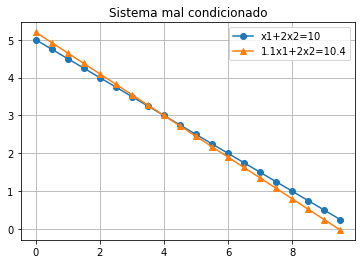

In [11]:
x=np.arange(0,10,.5)
recta1 = lambda x: 1/2.0*(10-1*x)
recta2 = lambda x: 1/2.0*(10.4-1.1*x)
plt.plot(x,recta1(x),'o-',x,recta2(x),'^-')
plt.title('Sistema mal condicionado')
plt.legend(('x1+2x2=10','1.1x1+2x2=10.4'))
plt.grid(True)
plt.show()

```{admonition} Observación
:class: tip

Obsérvese que las dos rectas anteriores tienen una inclinación (pendiente) similar por lo que no se ve claramente el punto en el que intersectan.
```

In [12]:
print('inciso b')
A = np.array([[1.05, 2], [1.1, 2]])
b = np.array([10,10.4])
print('matriz A ligeramente modificada:')
pprint.pprint(A)
print('lado derecho b:')
pprint.pprint(b)

inciso b
matriz A ligeramente modificada:
array([[1.05, 2.  ],
       [1.1 , 2.  ]])
lado derecho b:
array([10. , 10.4])


In [13]:
x=np.linalg.solve(A,b)
print('solución x:')
pprint.pprint(x)

solución x:
array([8. , 0.8])


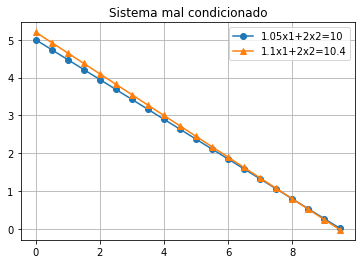

In [13]:
x=np.arange(0,10,.5)
recta1 = lambda x: 1/2.0*(10-1.05*x)
recta2 = lambda x: 1/2.0*(10.4-1.1*x)
plt.plot(x,recta1(x),'o-',x,recta2(x),'^-')
plt.title('Sistema mal condicionado')
plt.legend(('1.05x1+2x2=10','1.1x1+2x2=10.4'))
plt.grid(True)
plt.show()

```{admonition} Observación
:class: tip

Al modificar un poco las entradas de la matriz $A$ la solución del sistema cambia drásticamente.
```

```{admonition} Comentario

Otra forma de describir a un sistema mal condicionado es que un amplio rango de valores en un SPFN satisfacen tal sistema de forma aproximada.

```

- De este ejercicio vemos que la solución de ambos sistemas, a pesar de ser muy parecidos, varía mucho.
- Este es un problema mal condicionado (con pequeña perturbación en datos de entrada hay grandes cambios en datos de salida).

2.Resolver los siguientes sistemas:
    
$$a) \begin{array}{ccc} .03x_1 + 58.9x_2   &= & 59.2 \\ 5.31x_1 -6.1x_2 &= & 47 \end{array} $$

$$b) \begin{array}{ccc} .03x_1 + 58.9x_2   &= & 59.2 \\ 5.31x_1 -6.05x_2 &= & 47 \end{array} $$

In [15]:
print('inciso a')
A = np.array([[.03, 58.9], [5.31, -6.1]])
b = np.array([59.2,47])
print('matriz A:')
pprint.pprint(A)
print('lado derecho b:')
pprint.pprint(b)

inciso a
matriz A:
array([[ 0.03, 58.9 ],
       [ 5.31, -6.1 ]])
lado derecho b:
array([59.2, 47. ])


In [16]:
x=np.linalg.solve(A,b)
print('solución x:')
pprint.pprint(x)

solución x:
array([10.,  1.])


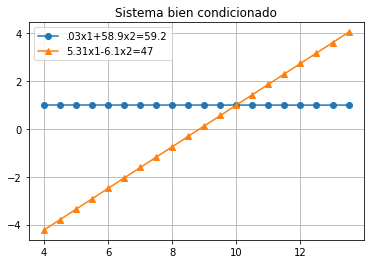

In [17]:
x=np.arange(4,14,.5)
recta1 = lambda x: 1/58.9*(59.2-.03*x)
recta2 = lambda x: 1/6.1*(5.31*x-47)
plt.plot(x,recta1(x),'o-',x,recta2(x),'^-')
plt.title('Sistema bien condicionado')
plt.legend(('.03x1+58.9x2=59.2','5.31x1-6.1x2=47'))
plt.grid(True)
plt.show()

```{admonition} Observación
:class: tip

Obsérvese que la solución del sistema de ecuaciones (intersección entre las dos rectas) está claramente definido.
```

In [18]:
print('inciso b')
A = np.array([[.03, 58.9], [5.31, -6.05]])
b = np.array([59.2,47])
print('matriz A ligeramente modificada:')
pprint.pprint(A)
print('lado derecho b:')
pprint.pprint(b)

inciso b
matriz A ligeramente modificada:
array([[ 0.03, 58.9 ],
       [ 5.31, -6.05]])
lado derecho b:
array([59.2, 47. ])


In [19]:
x=np.linalg.solve(A,b)
print('solución x:')
pprint.pprint(x)

solución x:
array([9.991, 1.   ])


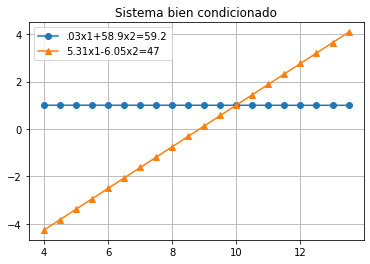

In [20]:
x=np.arange(4,14,.5)
recta1 = lambda x: 1/58.9*(59.2-.03*x)
recta2 = lambda x: 1/6.05*(5.31*x-47)
plt.plot(x,recta1(x),'o-',x,recta2(x),'^-')
plt.title('Sistema bien condicionado')
plt.legend(('.03x1+58.9x2=59.2','5.31x1-6.05x2=47'))
plt.grid(True)
plt.show()

- En este caso vemos que los valores de salida son muy parecidos, por lo que hablamos de un caso bien condicionado.

```{admonition} Observación
:class: tip

Al modificar un poco las entradas de la matriz $A$ la solución **no** cambia mucho.
```

```{admonition} Comentarios

1.¿Por qué nos interesa considerar perturbaciones en los datos de entrada? -> recuérdese que los números reales se representan en la máquina mediante el sistema de punto flotante (SPF), entonces al ingresar datos a la máquina tenemos perturbaciones y por tanto errores de redondeo. Ver nota: {ref}`Sistema de punto flotante <SPF>`.

2.Las matrices anteriores tienen número de condición distinto:

```

- Para el análisis de algoritmos debemos incluir este análisis de sensibilidad.

In [21]:
print('matriz del ejemplo 1')
A = np.array([[1, 2], [1.1, 2]])
pprint.pprint(A)

matriz del ejemplo 1
array([[1. , 2. ],
       [1.1, 2. ]])


In [22]:
print(np.linalg.cond(A))

51.030403839186725


In [23]:
print('matriz del ejemplo 2')
A = np.array([[.03, 58.9], [5.31, -6.1]])
pprint.pprint(A)

matriz del ejemplo 2
array([[ 0.03, 58.9 ],
       [ 5.31, -6.1 ]])


In [24]:
print(np.linalg.cond(A))

11.205557604869346


```{admonition} Comentario

Las matrices del ejemplo $1$ y $2$ son **medianamente** condicionadas. Una matriz se dice **bien condicionada** si cond$(A)$ es cercano a $1$.
```

## Algunas propiedades del número de condición de una matriz

* Si $A \in \mathbb{R}^{n\times n}$ es no singular entonces:

$$\frac{1}{\text{cond}(A)} = \min \left\{ \frac{||A-B||}{||A||} \text{tal que} B \text{ es singular}, ||\cdot|| \text{ es una norma inducida} \right\}.$$

esto es, una matriz mal condicionada (número de condición grande) se le puede aproximar muy bien por una matriz singular. Sin embargo, el mal condicionamiento no necesariamente se relaciona con singularidad. Una matriz singular es mal condicionada pero una matriz mal condicionada no necesariamente es singular. Considérese por ejemplo la matriz de **Hilbert**:

- Las matrices ortogonales tienen un número de condición de 1. Preferimos la implementación de algoritmos en estas.
- Hay otras matrices que también tienen un número de condición bueno.
- Una matriz singular es que no tenga inversa.

In [25]:
from scipy.linalg import hilbert

In [26]:
print(hilbert(4))

[[1.    0.5   0.333 0.25 ]
 [0.5   0.333 0.25  0.2  ]
 [0.333 0.25  0.2   0.167]
 [0.25  0.2   0.167 0.143]]


In [27]:
print(np.linalg.cond(hilbert(4)))

15513.738738928929


la cual es una matriz mal condicionada pero es no singular:

In [28]:
print(np.linalg.inv(hilbert(4))@hilbert(4))

[[ 1. -0. -0. -0.]
 [ 0.  1.  0.  0.]
 [-0. -0.  1. -0.]
 [ 0.  0.  0.  1.]]


y otro ejemplo de una matriz singular:

In [29]:
print('matriz singular')
A = np.array([[1, 2], [1, 2]])
pprint.pprint(A)

matriz singular
array([[1, 2],
       [1, 2]])


In [30]:
print(np.linalg.inv(A))

LinAlgError: Singular matrix

In [31]:
print(np.linalg.cond(A))

inf


* Para las normas matriciales inducidas se tiene:

    * cond$(A)\geq 1, \forall A \in \mathbb{R}^{n\times n}$.
    
    * cond$(\gamma A) = \text{cond}(A), \forall \gamma \in \mathbb{R}-\{0\}, \forall A \in \mathbb{R}^{n\times n}$.
    
    * cond$_2(A) = ||A||_2||A^{-1}||_2 = \frac{\sigma_{\max}}{\sigma_{\min}}, \sigma_{\min} \neq 0$.

* En el problema: resolver $Ax = b$ se cumple:

$$\text{ErrRel}(\hat{x}) = \frac{||x^*-\hat{x}||}{||x^*||} \leq \text{cond}(A) \left ( \frac{||\Delta A||}{||A||} + \frac{||\Delta b||}{||b||} \right ), b \neq 0.$$

donde: $x^*$ es solución de $Ax=b$ y $\hat{x}$ es solución aproximada que se obtiene por algún método numérico (por ejemplo factorización LU). $\frac{||\Delta A||}{||A||}, \frac{||\Delta b||}{||b||}$ son los errores relativos en las entradas de $A$ y $b$ respectivamente.

- Siempre hay que calcular el número de condición de la matriz.
- Busquemos que nuestra matriz esté bien condicionada.

```{admonition} Comentario

La desigualdad anterior se puede interpretar como sigue: si sólo tenemos perturbaciones en $A$ de modo que se tienen errores por redondeo del orden de $10^{-k}$ y por lo tanto $k$ dígitos de precisión en $A$ y cond$(A)$ es del orden de $10^c$ entonces $\text{ErrRel}(\hat{x})$ puede llegar a tener errores de redondeo de a lo más del orden de $10^{c-k}$ y por tanto $k-c$ dígitos de precisión:

$$\text{ErrRel}(\hat{x}) \leq \text{cond}(A) \frac{||\Delta A||}{||A||}.$$
```

* Supongamos que $x^*$ es solución del sistema $Ax=b$ y obtenemos $\hat{x}$ por algún método numérico (por ejemplo factorización LU) entonces ¿qué condiciones garantizan que $||x^*-\hat{x}||$ sea cercano a cero (del orden de $\epsilon_{maq}= 10^{-16}$), ¿de qué depende esto?

```{admonition} Definición
Para responder las preguntas anteriores definimos el residual de $Ax=b$ como 

$$r=A\hat{x}-b$$ 

con $\hat{x}$ aproximación a $x^*$ obtenida por algún método numérico. Asimismo, el residual relativo a la norma de $b$ como:

$$\frac{||r||}{||b||}.$$
```

```{admonition} Observación
:class: tip

Típicamente $x^*$ (solución exacta) es desconocida y por ello no podríamos calcular $||x^*-\hat{x}||$, sin embargo sí podemos calcular el residual relativo a la norma de $b$: $\frac{||r||}{||b||}$. ¿Se cumple que $\frac{||r||}{||b||}$ pequeño implica $\text{ErrRel}(\hat{x})$ pequeño? El siguiente resultado nos ayuda a responder esta y las preguntas anteriores.

```

Sea $A \in \mathbb{R}^{n\times n}$ no singular, $x^*$ solución de $Ax=b$, $\hat{x}$ aproximación a $x^*$, entonces para las normas matriciales inducidas se cumple:

$$\frac{||r||}{||b||} \frac{1}{\text{cond}(A)} \leq \frac{||x^*-\hat{x}||}{||x^*||}\leq \text{cond}(A)\frac{||r||}{||b||}.$$

Por la desigualdad anterior, si $\text{cond}(A) \approx 1$ entonces $\frac{||r||}{||b||}$ es una buena estimación de $\text{ErrRel}(\hat{x}) = \frac{||x^*-\hat{x}||}{||x^*||}$ por lo que si el residual relativo es pequeño entonces $\hat{x}$ es una buena estimación de $x^*$ (si la precisión y exactitud definida es aceptable para la aplicación o problema en cuestión). Si $\text{cond}(A)$ es grande no podemos decir **nada** acerca de $\text{ErrRel}(\hat{x})$ ni de $\hat{x}$.

### Ejemplos

Para los siguientes ejemplos supóngase que $x^*$ y  $\hat{x}$ son soluciones del inciso a) y b) respectivamente. Considérese como $b$ el del sistema del inciso a) y aplíquese el resultado anterior.

1.Resolver:

$$a) \begin{array}{ccc} x_1 + x_2   &= & 2 \\ 10.05x_1 + 10x_2 &= & 21 \end{array} $$

$$b) \begin{array}{ccc} x_1 + x_2   &= & 2 \\ 10.1x_1 + 10x_2 &= & 21 \end{array} $$

In [32]:
print('inciso a')
A_1 = np.array([[1, 1], [10.05, 10]])
b_1 = np.array([2,21])
print('matriz A_1:')
pprint.pprint(A_1)
print('lado derecho b_1:')
pprint.pprint(b_1)

inciso a
matriz A_1:
array([[ 1.  ,  1.  ],
       [10.05, 10.  ]])
lado derecho b_1:
array([ 2, 21])


In [33]:
x_est=np.linalg.solve(A_1,b_1)
print('solución x_est:')
pprint.pprint(x_est)

solución x_est:
array([ 20., -18.])


In [34]:
print('inciso b')
A_2 = np.array([[1, 1], [10.1, 10]])
b_2 = np.array([2,21])
print('matriz A_2:')
pprint.pprint(A_2)
print('lado derecho b_2:')
pprint.pprint(b_2)

inciso b
matriz A_2:
array([[ 1. ,  1. ],
       [10.1, 10. ]])
lado derecho b_2:
array([ 2, 21])


In [35]:
x_hat=np.linalg.solve(A_2,b_2)
print('solución x_hat:')
pprint.pprint(x_hat)

solución x_hat:
array([10., -8.])


In [37]:
print('residual relativo:')
r_rel = np.linalg.norm(A_1@x_hat-b_1)/np.linalg.norm(b_1)
print(r_rel)

residual relativo:
0.02370227315699886


In [38]:
print('error relativo:')
err_rel = np.linalg.norm(x_hat-x_est)/np.linalg.norm(x_est)
pprint.pprint(err_rel)

error relativo:
0.5255883312276278


**no tenemos una buena estimación del error relativo a partir del residual relativo pues:**

In [39]:
print(np.linalg.cond(A_1))

4060.0497536998155


De acuerdo a la cota del resultado el error relativo se encuentra en el intervalo:

In [40]:
print((r_rel*1/np.linalg.cond(A_1), r_rel*np.linalg.cond(A_1)))

(5.837926773040061e-06, 96.23240829319897)


2.Resolver:

$$a) \begin{array}{ccc} 4.1x_1 + 2.8x_2   &= & 4.1 \\ 9.7x_1 + 6.6x_2 &= & 9.7 \end{array}$$

$$b) \begin{array}{ccc} 4.1x_1 + 2.8x_2   &= & 4.11 \\ 9.7x_1 + 6.6x_2 &= & 9.7 \end{array}$$

In [41]:
print('inciso a')
A_1 = np.array([[4.1, 2.8], [9.7, 6.6]])
b_1 = np.array([4.1,9.7])
print('matriz A_1:')
pprint.pprint(A_1)
print('lado derecho b_1:')
pprint.pprint(b_1)

inciso a
matriz A_1:
array([[4.1, 2.8],
       [9.7, 6.6]])
lado derecho b_1:
array([4.1, 9.7])


In [42]:
x_est=np.linalg.solve(A_1,b_1)
print('solución x_est:')
pprint.pprint(x_est)

solución x_est:
array([1., 0.])


In [43]:
print('inciso b')
A_2 = np.array([[4.1, 2.8], [9.7, 6.6]])
b_2 = np.array([4.11,9.7])
print('matriz A_2:')
pprint.pprint(A_2)
print('lado derecho b_2:')
pprint.pprint(b_2)

inciso b
matriz A_2:
array([[4.1, 2.8],
       [9.7, 6.6]])
lado derecho b_2:
array([4.11, 9.7 ])


In [44]:
x_hat=np.linalg.solve(A_2,b_2)
print('solución x_hat:')
pprint.pprint(x_hat)

solución x_hat:
array([0.34, 0.97])


In [45]:
print('residual relativo:')
r_rel = np.linalg.norm(A_1@x_hat-b_1)/np.linalg.norm(b_1)
print(r_rel)

residual relativo:
0.0009495858335005704


In [46]:
print('error relativo:')
err_rel = np.linalg.norm(x_hat-x_est)/np.linalg.norm(x_est)
pprint.pprint(err_rel)

error relativo:
1.1732433677631406


**no tenemos una buena estimación del error relativo a partir del residual relativo pues:**

In [47]:
print(np.linalg.cond(A_1))

1622.9993838565106


In [48]:
print((r_rel*1/np.linalg.cond(A_1), r_rel*np.linalg.cond(A_1)))

(5.850808342540463e-07, 1.5411772226902969)


3.Resolver:

$$a) \begin{array}{ccc} 3.9x_1 + 11.6x_2   &= & 5.5 \\ 12.8x_1 + 2.9x_2 &= & 9.7 \end{array}$$

$$b) \begin{array}{ccc} 3.95x_1 + 11.6x_2   &= & 5.5 \\ 12.8x_1 + 2.9x_2 &= & 9.7 \end{array}$$

In [49]:
print('inciso a')
A_1 = np.array([[3.9, 11.6], [12.8, 2.9]])
b_1 = np.array([5.5,9.7])
print('matriz A_1:')
pprint.pprint(A_1)
print('lado derecho b_1:')
pprint.pprint(b_1)

inciso a
matriz A_1:
array([[ 3.9, 11.6],
       [12.8,  2.9]])
lado derecho b_1:
array([5.5, 9.7])


In [50]:
x_est=np.linalg.solve(A_1,b_1)
print('solución x_est:')
pprint.pprint(x_est)

solución x_est:
array([0.704, 0.237])


In [51]:
print('inciso b')
A_2 = np.array([[3.95, 11.6], [12.8, 2.9]])
b_2 =  np.array([5.5,9.7])
print('matriz A_2:')
pprint.pprint(A_2)
print('lado derecho b_2:')
pprint.pprint(b_2)

inciso b
matriz A_2:
array([[ 3.95, 11.6 ],
       [12.8 ,  2.9 ]])
lado derecho b_2:
array([5.5, 9.7])


In [52]:
x_hat=np.linalg.solve(A_2,b_2)
print('solución x_hat:')
pprint.pprint(x_hat)

solución x_hat:
array([0.705, 0.234])


In [54]:
print('residual relativo:')
r_rel = np.linalg.norm(A_1@x_hat-b_1)/np.linalg.norm(b_1)
print(r_rel)

residual relativo:
0.0031601448781200417


In [55]:
print('error relativo:')
err_rel = np.linalg.norm(x_hat-x_est)/np.linalg.norm(x_est)
pprint.pprint(err_rel)

error relativo:
0.004537910940159858


**sí tenemos una buena estimación del error relativo a partir del residual relativo pues:**

In [56]:
print(np.linalg.cond(A_1))

1.7884565161384884


In [57]:
print((r_rel*1/np.linalg.cond(A_1), r_rel*np.linalg.cond(A_1)))

(0.0017669676895154308, 0.005651781699215458)


4.Utilizando $\theta=\frac{\pi}{3}$

In [58]:
theta_1=math.pi/3

In [59]:
print((math.cos(theta_1),math.sin(theta_1)))

(0.5000000000000001, 0.8660254037844386)


In [60]:
theta_2 = math.pi/3 + .00005

In [61]:
print(theta_2)

1.0472475511965977


In [62]:
print((math.cos(theta_2),math.sin(theta_2)))

(0.49995669810482884, 0.8660504027018965)


Resolver:

$$a) \begin{array}{ccc} \cos(\theta_1)x_1 - \sin(\theta_1)x_2   &= & -1.5 \\ \sin(\theta_1)x_1 + \cos(\theta_1)x_2 &= & 2.4 \end{array}$$

$$b) \begin{array}{ccc} \cos(\theta_2)x_1 - \sin(\theta_2)x_2   &= & -1.5 \\ \sin(\theta_2)x_1 + \cos(\theta_2)x_2 &= & 2.4 \end{array}$$

$$c) \begin{array}{ccc} \cos(\theta_2)x_1 - \sin(\theta_2)x_2   &= & -1.7 \\ \sin(\theta_2)x_1 + \cos(\theta_2)x_2 &= & 2.4 \end{array}$$

In [63]:
print('inciso a')
A_1 = np.array([[math.cos(theta_1), -math.sin(theta_1)], [math.sin(theta_1), math.cos(theta_1)]])
b_1 = np.array([-1.5,2.4])
print('matriz A_1:')
pprint.pprint(A_1)
print('lado derecho b_1:')
pprint.pprint(b_1)

inciso a
matriz A_1:
array([[ 0.5  , -0.866],
       [ 0.866,  0.5  ]])
lado derecho b_1:
array([-1.5,  2.4])


In [64]:
x_est=np.linalg.solve(A_1,b_1)
print('solución x_est:')
pprint.pprint(x_est)

solución x_est:
array([1.328, 2.499])


In [65]:
print('inciso b')
A_2 = np.array([[math.cos(theta_2), -math.sin(theta_2)], [math.sin(theta_2), math.cos(theta_2)]])
b_2 = np.array([-1.5,2.4])
print('matriz A_2:')
pprint.pprint(A_2)
print('lado derecho b_2:')
pprint.pprint(b_2)

inciso b
matriz A_2:
array([[ 0.5  , -0.866],
       [ 0.866,  0.5  ]])
lado derecho b_2:
array([-1.5,  2.4])


In [66]:
x_hat=np.linalg.solve(A_2,b_2)
print('solución x_hat:')
pprint.pprint(x_hat)

solución x_hat:
array([1.329, 2.499])


In [68]:
print('residual relativo:')
r_rel = np.linalg.norm(A_1@x_hat-b_1)/np.linalg.norm(b_1)
print("{:0.10e}".format(r_rel))

residual relativo:
4.9999999995e-05


In [69]:
print('error relativo:')
err_rel = np.linalg.norm(x_hat-x_est)/np.linalg.norm(x_est)
print("{:0.10e}".format(err_rel))

error relativo:
4.9999999995e-05


**sí tenemos una buena estimación del error relativo a partir del residual relativo pues:**

In [70]:
print(np.linalg.cond(A_1))

1.0


In [71]:
print(("{:0.10e}".format(r_rel*1/np.linalg.cond(A_1)), 
       "{:0.10e}".format(r_rel*np.linalg.cond(A_1))))

('4.9999999995e-05', '4.9999999995e-05')


In [72]:
print('inciso c')
A_2 = np.array([[math.cos(theta_2), -math.sin(theta_2)], [math.sin(theta_2), math.cos(theta_2)]])
b_2 = np.array([-1.7,2.4])
print('matriz A_2:')
pprint.pprint(A_2)
print('lado derecho b_2:')
pprint.pprint(b_2)

inciso c
matriz A_2:
array([[ 0.5  , -0.866],
       [ 0.866,  0.5  ]])
lado derecho b_2:
array([-1.7,  2.4])


In [73]:
x_hat=np.linalg.solve(A_2,b_2)
print('solución x_hat:')
pprint.pprint(x_hat)

solución x_hat:
array([1.229, 2.672])


In [74]:
print('residual relativo:')
r_rel = np.linalg.norm(A_1@x_hat-b_1)/np.linalg.norm(b_1)
print("{:0.14e}".format(r_rel))

residual relativo:
7.06241310531940e-02


In [75]:
print('error relativo:')
err_rel = np.linalg.norm(x_hat-x_est)/np.linalg.norm(x_est)
print("{:0.14e}".format(err_rel))

error relativo:
7.06241310531940e-02


**sí tenemos una buena estimación del error relativo a partir del residual relativo pues:**

In [76]:
print(np.linalg.cond(A_1))

1.0


In [77]:
print(("{:0.14e}".format(r_rel*1/np.linalg.cond(A_1)), 
       "{:0.14e}".format(r_rel*np.linalg.cond(A_1))))

('7.06241310531940e-02', '7.06241310531940e-02')


Así, $\text{cond}(A)$ nos da una calidad (mediante $\frac{||r||}{||b||}$) de la solución $\hat{x}$ en el problema inicial (resolver $Ax=b$) obtenida por algún método numérico respecto a la solución $x^*$ de $Ax=b$.


```{admonition} Observación
:class: tip

* El ejercicio anterior (en el que se define el ángulo $\theta$) utiliza matrices de rotación que son matrices ortogonales. Las matrices ortogonales tienen número de condición igual a $1$ bajo las normas inducidas.

* Obsérvese que la condición del problema inicial (resolver $Ax=b$) **no depende del método númerico** que se elige para resolverlo.
```

```{admonition} Ejercicio:
:class: tip

Proponer sistemas de ecuaciones lineales con distinto número de condición, perturbar matriz del sistema o lado derecho (o ambos) y revisar números de condición y residuales relativos de acuerdo a la cota:

$$\frac{||r||}{||b||} \frac{1}{\text{cond}(A)} \leq \frac{||x^*-\hat{x}||}{||x^*||}\leq \text{cond}(A)\frac{||r||}{||b||}.$$

Verificar que si el número de condición del sistema es pequeño entonces el residual relativo estima bien al error relativo.

```

- Hay matrices que pueden precondicionarse para que se desempeñen mejor.

## Número de condición de una matriz $A \in \mathbb{R}^{m\times n}$

- No podemos hacer referencia a la propiedad de ser invertible.

Para este caso se utiliza la **pseudoinversa** de $A$ definida a partir de la descomposición en valores singulares compacta (compact SVD, ver [Factorizaciones matriciales SVD, Cholesky, QR](https://www.dropbox.com/s/s4ch0ww1687pl76/3.2.2.Factorizaciones_matriciales_SVD_Cholesky_QR.pdf?dl=0)) y denotada como $A^{\dagger}$:

$$A^{\dagger} = V \Sigma^{\dagger} U^T$$

donde: $\Sigma ^{\dagger}$ es la matriz transpuesta de $\Sigma$ y tiene entradas $\sigma_i^{+}:$

$$\sigma_i^+ = \begin{cases}
\frac{1}{\sigma_i} &\text{ si } \sigma_i \neq 0,\\
0 &\text{ en otro caso}
\end{cases}
$$

$\forall i=1,\dots, r$ con $r=rank(A)$.

- Sigma es la matriz diagnoal que tiene los valores singulares.

```{admonition} Comentarios y propiedades

* $A^{\dagger}$ se le conoce como pseudoinversa de $Moore-Penrose$.

* Si $rank(A)=n$ entonces $A^{\dagger} = (A^TA)^{-1}A^T$, si $rank(A)=m$, $A^\dagger = A^T(AA^T)^{-1}$, si $A\in \mathbb{R}^{n\times n}$ no singular, entonces $A^\dagger=A^{-1}$.

* Con $A^\dagger$ se define $\text{cond}(A)$ para $A \in \mathbb{R}^{m\times n}$:

$$\text{cond}(A) = ||A||||A^\dagger||$$

de hecho, se tiene:

$$\text{cond}_2(A) = \frac{\sigma_{max}}{\sigma_{min}}=\frac{\sigma_1}{\sigma_r}.$$

```

- La pseudo inversa nos ayuda a resolver el problema de mínimos cuadrados lineales.

```{admonition} Ejercicios
:class: tip

1. Resuelve los ejercicios y preguntas de la nota.

```

**Preguntas de comprehensión**

1)¿Qué factores influyen en la falta de exactitud de un cálculo?

2)Si f es un problema mal condicionado, ¿a qué nos referimos? Da ejemplos de problemas bien y mal condicionados.

3)Si f es un problema que resolvemos con un algoritmo g, ¿qué significa:

a. que g sea estable?

b. que g sea estable hacia atrás?

c. que g sea inestable?
    
4)¿Qué ventaja(s) se tiene(n) al calcular un error hacia atrás vs calcular un error hacia delante?



**Referencias**

1. Nota {ref}`Sistema de punto flotante <SPF>`.

2. L. Trefethen, D. Bau, Numerical linear algebra, SIAM, 1997.

3. G. H. Golub, C. F. Van Loan,Matrix Computations. John Hopkins University Press, 2013